In [2]:
#Importing necessary library
import pandas as pd
from pandas import read_csv
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Drug.csv')

LOADING DATASET

In [4]:
#Loading Dataset
filename = 'Drug.csv'
data = read_csv(filename)
data.head(5)

Drug Disease Gender  Age
0               A CN Gel(Topical) 20gmA CN Soap 75gm    Acne   Male   23
1  A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...    Acne   Male   23
2                             ACGEL CL NANO Gel 15gm    Acne   Male   23
3                                ACGEL NANO Gel 15gm    Acne   Male   23
4                              Acleen 1% Lotion 25ml    Acne   Male   23

In [5]:
data.dtypes

Drug       object
Disease    object
Gender     object
Age         int64
dtype: object

In [6]:
data.shape

(4955, 4)

In [7]:
#check and handle missing values
data.isnull().sum()

Drug       0
Disease    0
Gender     0
Age        0
dtype: int64

Data Preprocessing

In [8]:
data.replace({'Gender':{'Female':0,'Male':1}},inplace=True)

In [9]:
x = data[['Disease']]

In [10]:
x.Disease.unique()

array(['Acne', 'Allergy', 'Diabetes', 'Fungal infection',
       'Urinary tract infection', 'Malaria', 'Migraine', 'Hepatitis B',
       'AIDS'], dtype=object)

In [11]:
data.replace({'Disease':{'Acne':0, 'Allergy':1, 'Diabetes':2, 'Fungal infection':3,
       'Urinary tract infection':4, 'Malaria':5, 'Migraine':6, 'Hepatitis B':7,
       'AIDS':8}},inplace=True)

In [12]:
data.head()

Drug  Disease  Gender  Age
0               A CN Gel(Topical) 20gmA CN Soap 75gm        0       1   23
1  A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...        0       1   23
2                             ACGEL CL NANO Gel 15gm        0       1   23
3                                ACGEL NANO Gel 15gm        0       1   23
4                              Acleen 1% Lotion 25ml        0       1   23

In [13]:
data.dtypes

Drug       object
Disease     int64
Gender      int64
Age         int64
dtype: object

#Fitting the Model

In [14]:
#Feature Seelection
df_x = data[['Disease','Gender','Age']]
df_y = data[['Drug']]

In [15]:
df_x.head()

Disease  Gender  Age
0        0       1   23
1        0       1   23
2        0       1   23
3        0       1   23
4        0       1   23

In [16]:
df_y.head()

Drug
0               A CN Gel(Topical) 20gmA CN Soap 75gm
1  A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...
2                             ACGEL CL NANO Gel 15gm
3                                ACGEL NANO Gel 15gm
4                              Acleen 1% Lotion 25ml

In [17]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y, test_size=0.2, random_state=0)

In [18]:
x_train.head()

Disease  Gender  Age
2150        2       1   23
167         0       0   20
3188        2       0   23
844         1       0   23
4129        3       0   37

In [19]:
y_train.head()

Drug
2150  Glycinorm Total 30mg Tablet 10'SGlycinorm Tota...
167                             Dersol BH Ointment 30gm
3188            Wosulin New 30/70 100IU Cartridge 3X3ml
844                              Lejet M JR Tablet 10'S
4129  Zocon 50mg Tablet 4'SZocon Transgel 15gmZocon ...

In [20]:
#Fitting The Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(df_x,np.ravel(df_y))

In [21]:
# Model Accuracy
from sklearn.metrics import accuracy_score
y_pred = rf.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred, normalize=False))


0.044399596367305755
44


In [22]:
#Score
rf.score(x_test,y_test)

0.044399596367305755

In [23]:
y_test.head()

Drug
2540  Metofix XL 500mg Tablet 10'SMetofix XL 1000mg ...
446                               ALL 3 5mg Tablet 10'S
4771  Lamivir 30mg Capsule 30'SLamivir 300mg Solutio...
541            Cetcip 10mg Tablet 10'SCetcip Syrup 30ml
1270   Acarcip 25mg Tablet 10'SAcarcip 50mg Tablet 10'S

In [24]:
# Making Prediction of Test dataset
prediction = rf.predict(x_test)
print(prediction[0:10])

["Gluconorm VG Plus 2mg Tablet 10'SGluconorm VG Plus 1mg Tablet 10'S"
 "Alaspan 10mg Tablet 10'S"
 "Hepcvir L 90mg Tablet 28'SHepcvir L 90mg Tablet 29'SHepcvir L 90mg Tablet 14'S"
 "Cetfast 10mg Tablet 10'SCetfast Syrup 30ml"
 "Gluconorm VG Plus 2mg Tablet 10'SGluconorm VG Plus 1mg Tablet 10'S"
 "AMPHOTIN LIP 10mg Injection 1'sAMPHOTIN LIP 50mg Injection 1's"
 "Hepcvir L 90mg Tablet 28'SHepcvir L 90mg Tablet 29'SHepcvir L 90mg Tablet 14'S"
 'Lumet AT 60mg Injection' 'Lumet AT 60mg Injection'
 "Hepcvir L 90mg Tablet 28'SHepcvir L 90mg Tablet 29'SHepcvir L 90mg Tablet 14'S"]


In [25]:
#Malking Prediction For Patient With Malaria,Age 24 and Sex is Male
#Malaria=5, Male=1, Age=24
test = [5,1,24]
test = np.array(test) #List to Numpy array
print(test.shape) #Shape of Array is 1D
test = np.array(test).reshape(1,-1) #convert 1D to 2D Array
print(test.shape)

(3,)
(1, 3)


In [26]:
# Recommendation Drug Name based on Disease, Gender , Age
prediction = rf.predict(test)
print(prediction[0])

Combither Forte 80/480mg Tablet 6'S


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
#Dumping the model in Disk
import joblib as joblib
joblib.dump(rf,'model/medical_rf.pk1')

['model/medical_rf.pk1']

In [28]:
clf = joblib.load('model/medical_rf.pk1')

In [29]:
# Make Prediction Using Loaded Model From Disk
prediction = clf.predict(test)
print(prediction[0])

Combither Forte 80/480mg Tablet 6'S


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#Fitting Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(df_x, np.ravel(df_y))

In [31]:
# Check model accuracy
y_pred = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred, normalize=False))


0.039354187689202826
39


In [32]:
gnb.score(x_test, y_test)

0.039354187689202826

In [33]:
#Making Recommendation of Drug Name
result = gnb.predict(test)
print(result[0])

Combither Forte 80/480mg Tablet 6'S


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [34]:
#Dump The Model In The Disk
joblib.dump(gnb,'model/medical_nb.pk1')

['model/medical_nb.pk1']

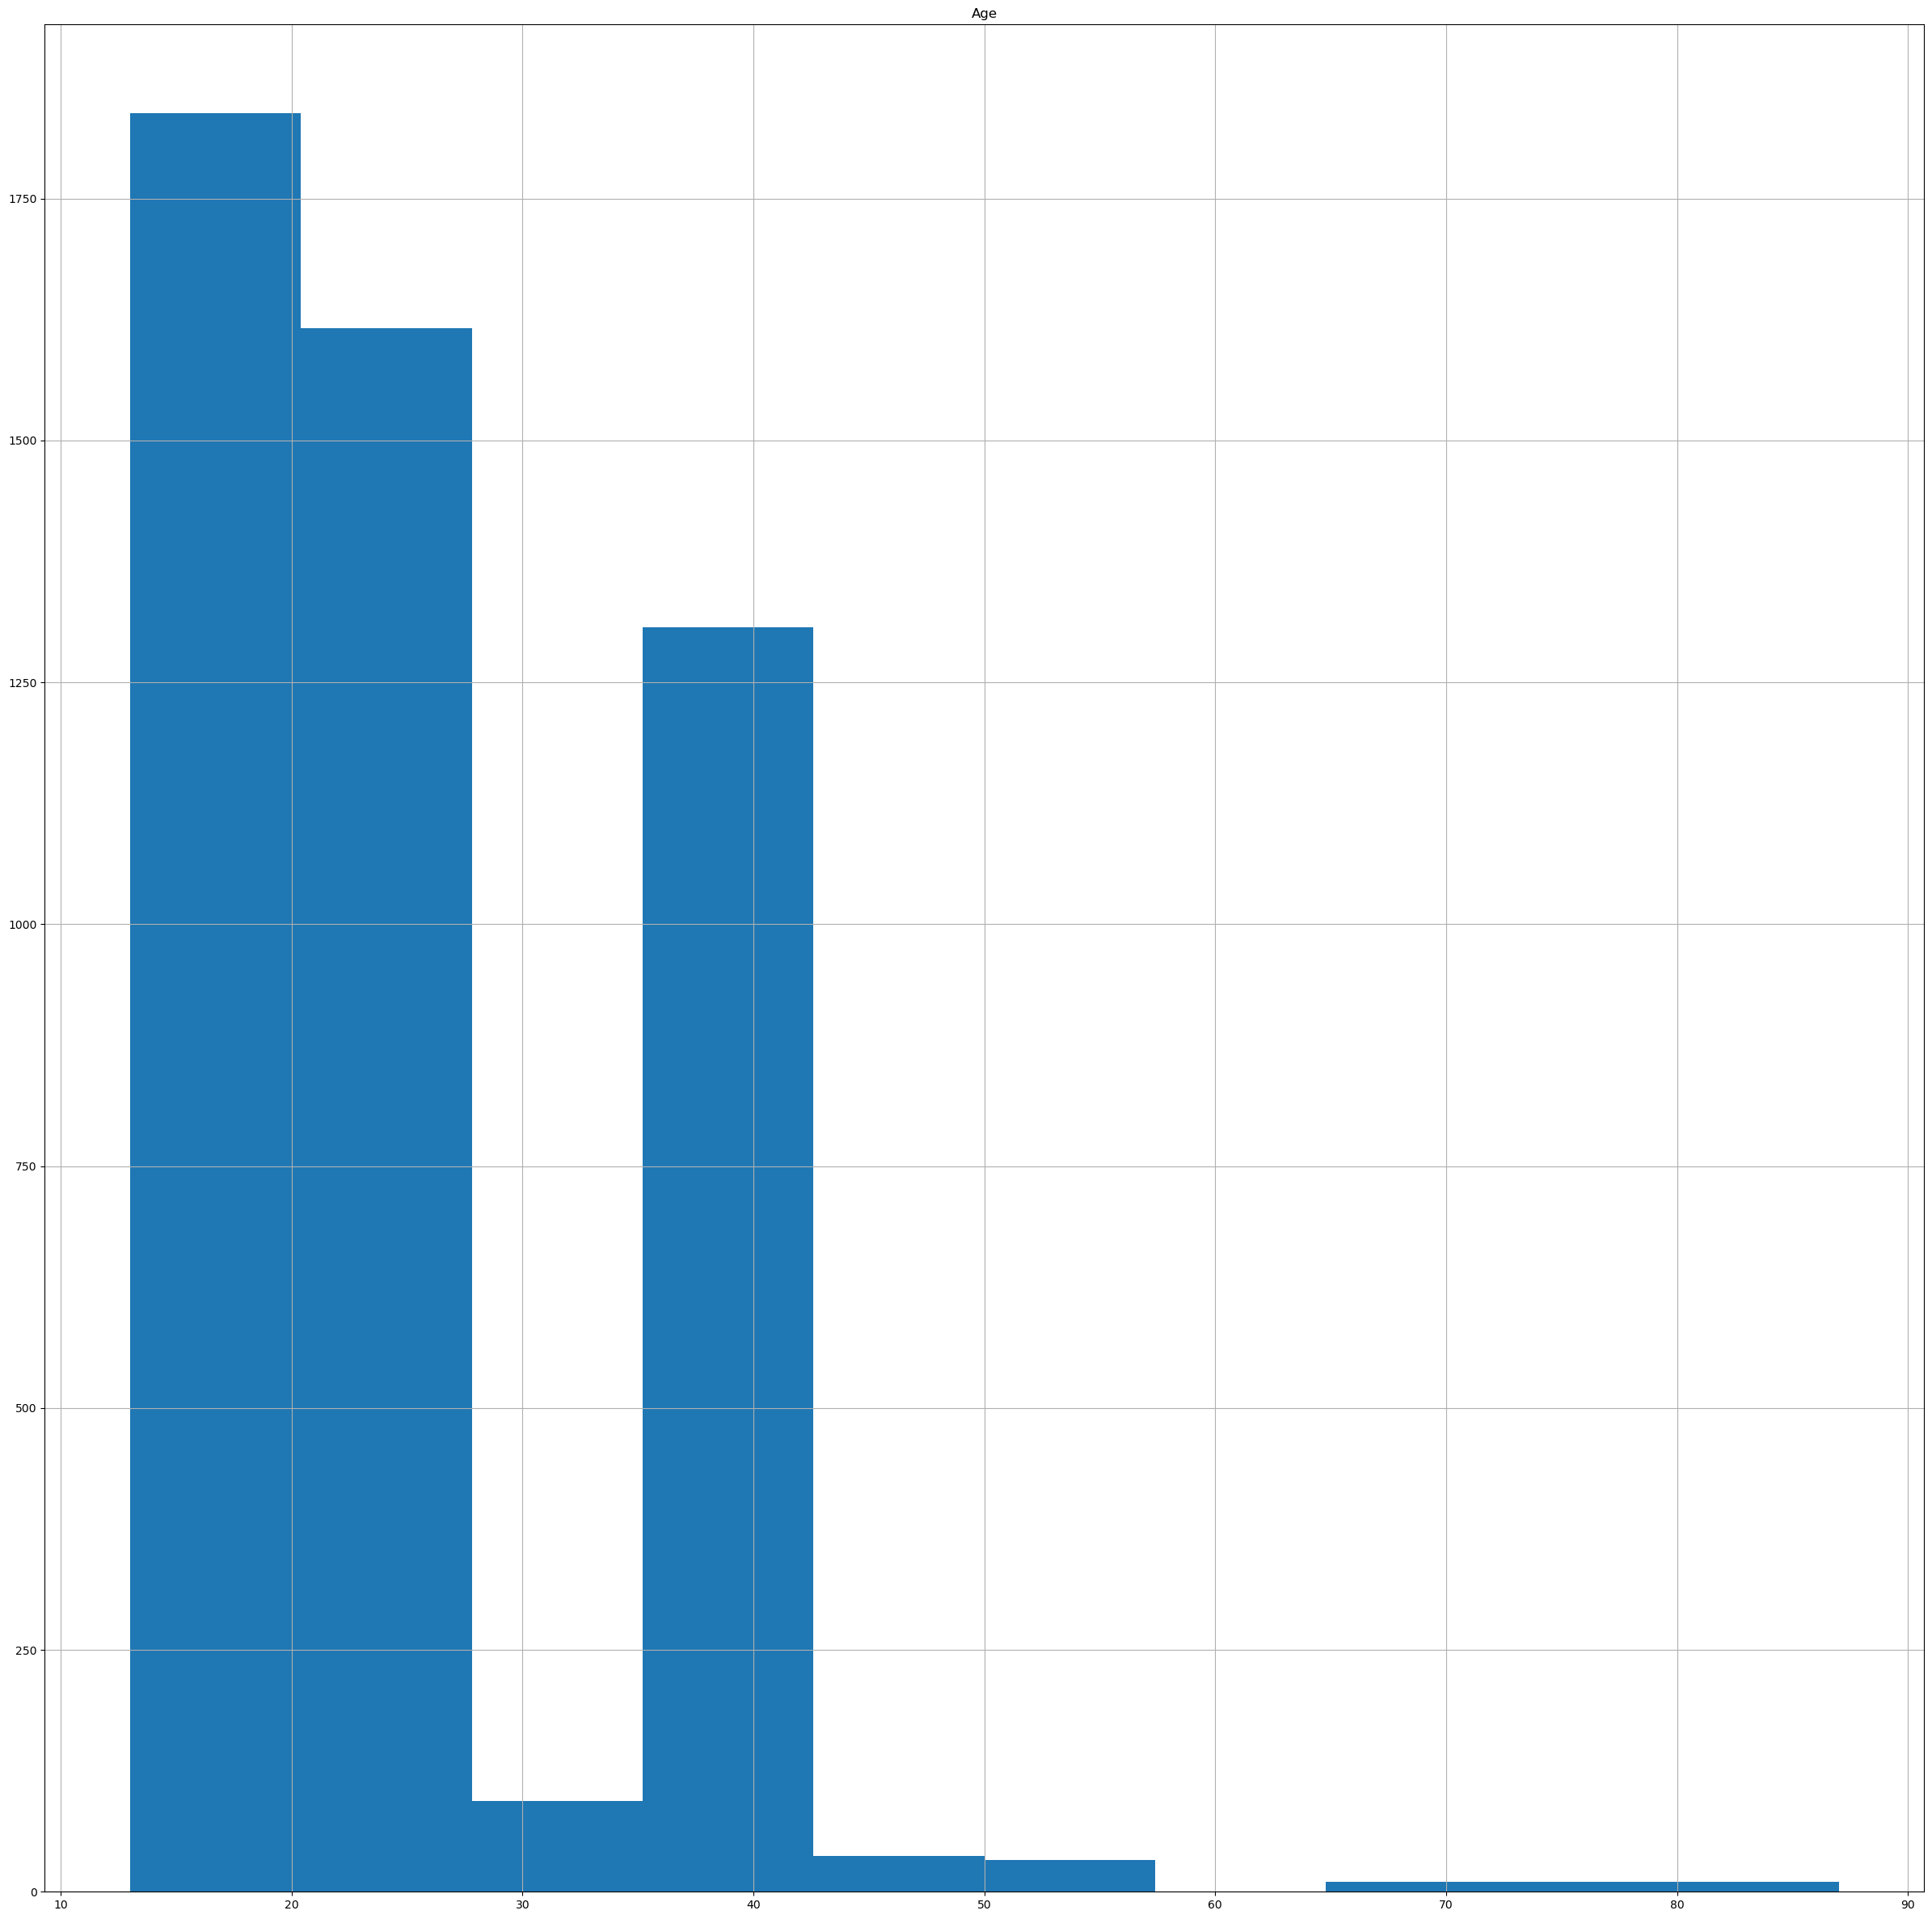

In [36]:
dataset.hist(figsize=(30,30))
plt.show()